# 표준편차
- 실제 관측값이 얼마나 분산되어서 분포하는가? / 통계치의 신뢰도에 관여
- 표준편차는 편차들의 제곱을 산술평균한 값
- u = 평균, sigma = 표준편차   E(X) - E(/X) , square(sigma) = 분산
- u - o ~ u + o 66.7%
- u - 2o ~ u + 2o 79.4%
- u - 3o ~ u + 3o 99.7%

In [1]:
import numpy as np
import pandas as pd

In [4]:
path = 'C:/Users/user/Desktop/TodayLearn/TiL/Code/data'

In [5]:
data = pd.read_csv(f'{path}/store_market_data.csv')

In [6]:
data.shape

(705571, 20)

In [7]:
data.head(5)

,공급일자,요일,공급월,공급주차,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,주소-구,주소-동,성별,연령,연령대,구매금액,구매매장,반품_원거래일자,구매시각
0,2018-01-02,화,1,1,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,수지구,풍덕천동,여,45.0,40대,22207,매장C,NaN,10:04
1,2018-01-02,화,1,1,1506656256,정상회원,채소,버섯,느타리버섯,느타리버섯(300g),1.0,수지구,풍덕천동,여,36.0,30대이하,4977,매장C,NaN,10:05
2,2018-01-02,화,1,1,1506656256,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,수지구,풍덕천동,여,36.0,30대이하,7083,매장C,NaN,10:05
3,2018-01-02,화,1,1,1023108864,정상회원,반찬,두부/유부,두부,연두부(100g),1.0,수지구,풍덕천동,여,36.0,30대이하,766,매장C,NaN,10:08
4,2018-01-02,화,1,1,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,수지구,풍덕천동,여,34.0,30대이하,4403,매장C,NaN,10:09


In [19]:
import matplotlib as mpl # 그래프 옵션
import matplotlib.pyplot as plt #그래프 출력

import seaborn as sns

# 그래프 설정 한글폰트
if os.name == 'nt' : # 윈도우 사용자
    mpl.rc('font', family = 'Malgun Gothic')
elif os.name == 'posix': # 맥 사용자
    mpl.rc('font', family = 'AppleGothic')
else :
    print("Check ur OS")
    
# 그래프의 한글을 선명하게
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

# 그래프에서 음수 값이 나올 때 깨지는 현상 방지
mpl.rc('axes', unicode_minus = False)

# 경고 메시지 처리

import warnings
warnings.filterwarnings('ignore')

In [17]:
import os
os.name

'nt'

In [22]:
df_fitness = pd.read_csv(f'{path}/health.csv', encoding = 'cp949')

df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


In [37]:
df_currency = pd.read_csv(f'{path}/exchange.csv', parse_dates = ['APPL_DATE'])
# 데이터를 불러오면서 날짜 변수를 지정
df_currency.shape

(273, 4)

In [38]:
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


In [32]:
df_currency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CURRENCY       273 non-null    object 
 1   APPL_DATE      273 non-null    int64  
 2   STD_RATE       273 non-null    float64
 3   USD_CONV_DATE  273 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB


<AxesSubplot:>

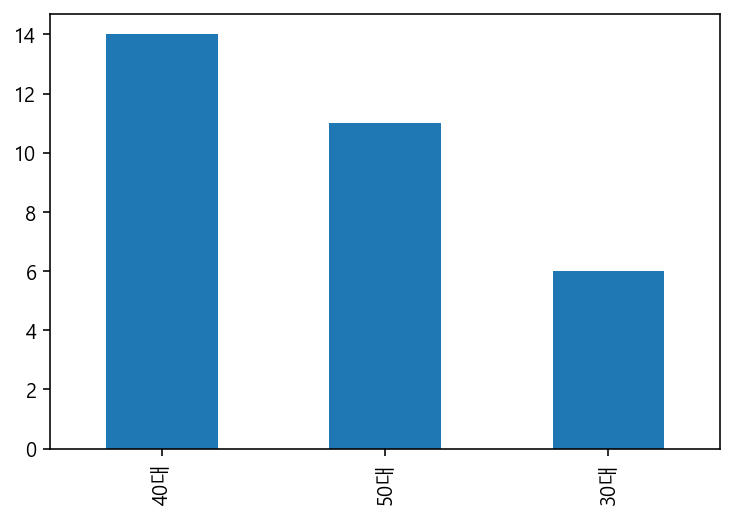

In [45]:
# 성별 Bar chart 그려보기
df_count = df_fitness['AGEGROUP'].value_counts()
df_count.plot.bar() # 판다스 라이브러리 활용

<AxesSubplot:xlabel='GENDER,AGEGROUP'>

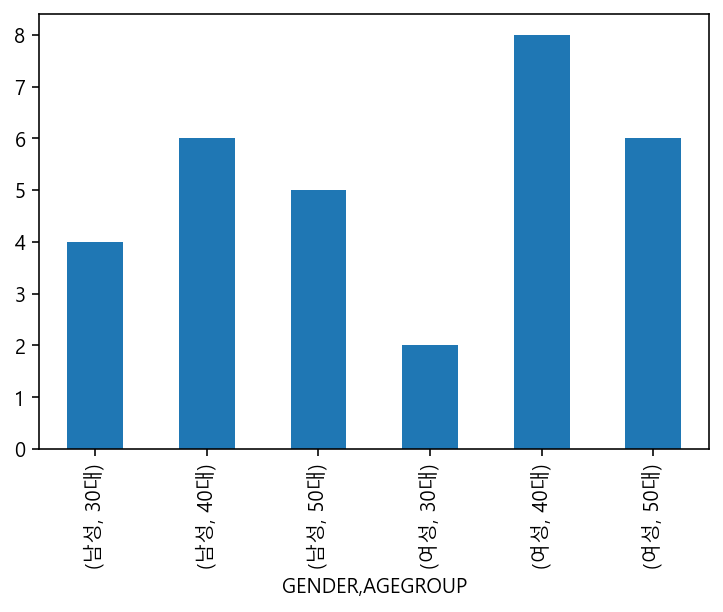

In [49]:
# 성별 연령대를 고려

df_groupby_total = df_fitness.groupby(['GENDER','AGEGROUP']).size()
df_groupby_total.plot.bar()

In [55]:
df_groupby_total = df_fitness.groupby(['GENDER', 'AGEGROUP'], as_index = False)['WEIGHT'].agg('count')

In [56]:
df_pivot = df_groupby_total.pivot('AGEGROUP', 'GENDER', 'WEIGHT')

<AxesSubplot:ylabel='AGEGROUP'>

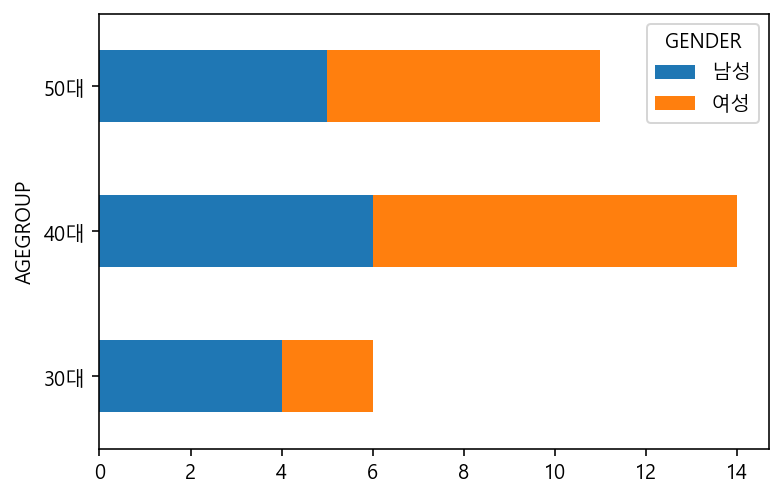

In [58]:
df_pivot.plot(kind = 'barh', stacked = True)

# 히스토그램
- 연속형 데이터를 요약하여 가로축에 계급(구간), 세로축에 빈도를 표현하는 그래프
- 일반적으로 계급 수는 7 ~10 개 이내
- 치우침 > 변환, 층별화 etc.. 

In [59]:
df_fitness.columns

Index(['NAME', 'GENDER', 'AGE', 'AGEGROUP', 'WEIGHT', 'OXY', 'RUNTIME',
       'RUNPULSE', 'RSTPULSE', 'MAXPULSE'],
      dtype='object')

<AxesSubplot:>

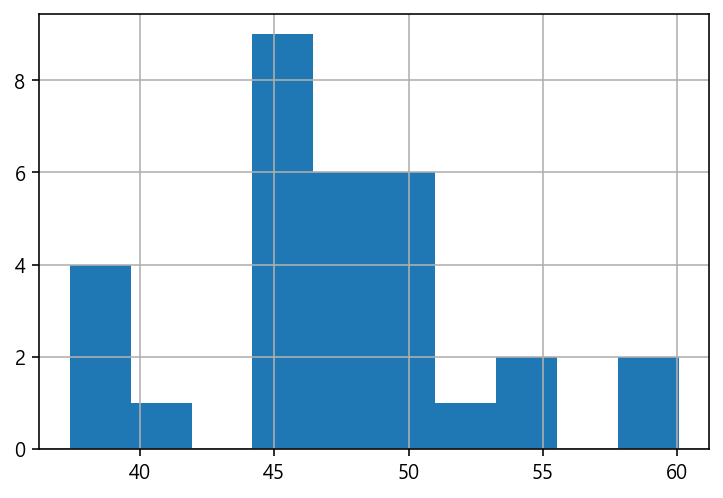

In [60]:
# 혈당 산소 요구량 히스토그램
df_fitness['OXY'].hist()

(array([4., 1., 0., 9., 6., 6., 1., 2., 0., 2.]),
 array([37.388 , 39.6547, 41.9214, 44.1881, 46.4548, 48.7215, 50.9882,
        53.2549, 55.5216, 57.7883, 60.055 ]),
 <BarContainer object of 10 artists>)

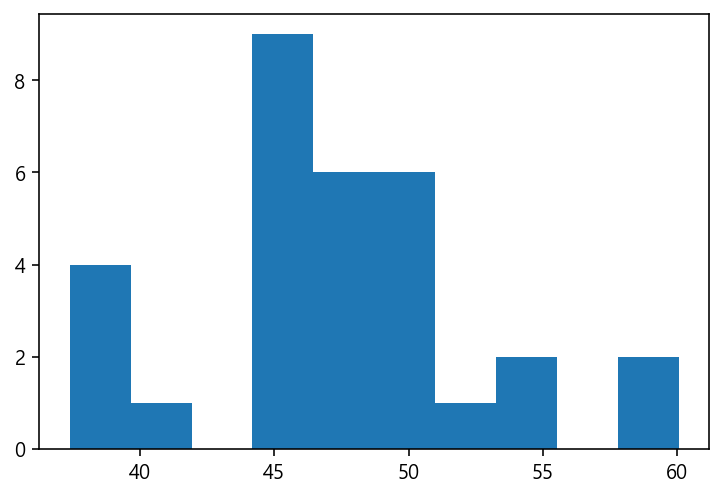

In [61]:
plt.hist(df_fitness['OXY'])

<AxesSubplot:xlabel='OXY', ylabel='Count'>

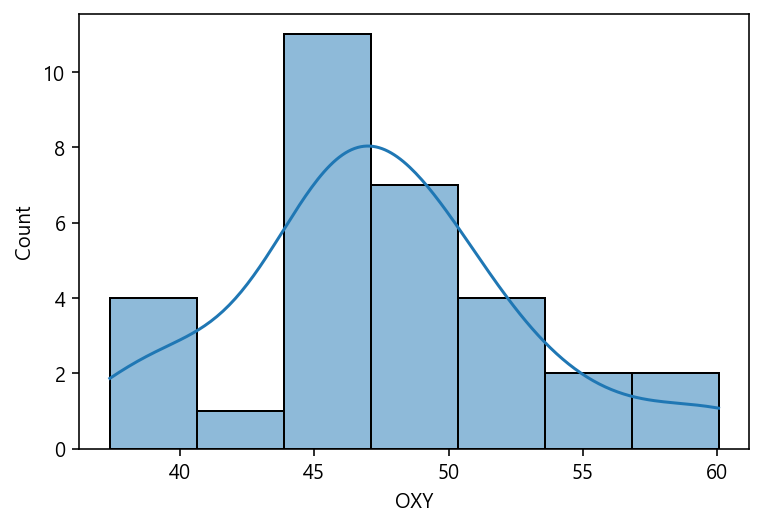

In [66]:
#혈당 산소요구량 (seeaborn)
sns.histplot(data = df_fitness, x = 'OXY', kde = True)

array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'WEIGHT'}>,
        <AxesSubplot:title={'center':'OXY'}>],
       [<AxesSubplot:title={'center':'RUNTIME'}>,
        <AxesSubplot:title={'center':'RUNPULSE'}>,
        <AxesSubplot:title={'center':'RSTPULSE'}>],
       [<AxesSubplot:title={'center':'MAXPULSE'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

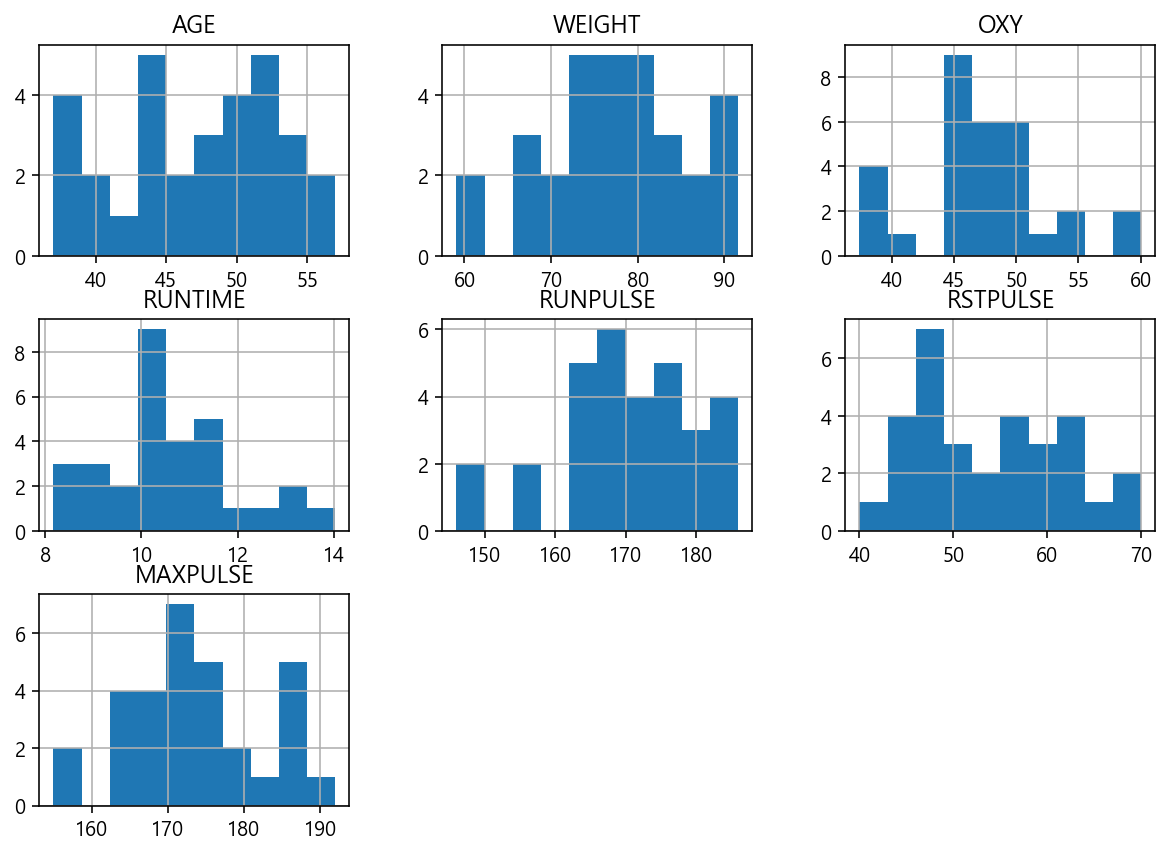

In [68]:
# 수치형 데이터에 대한 histogram 그리기
df_fitness.hist(figsize = (10, 7 ))

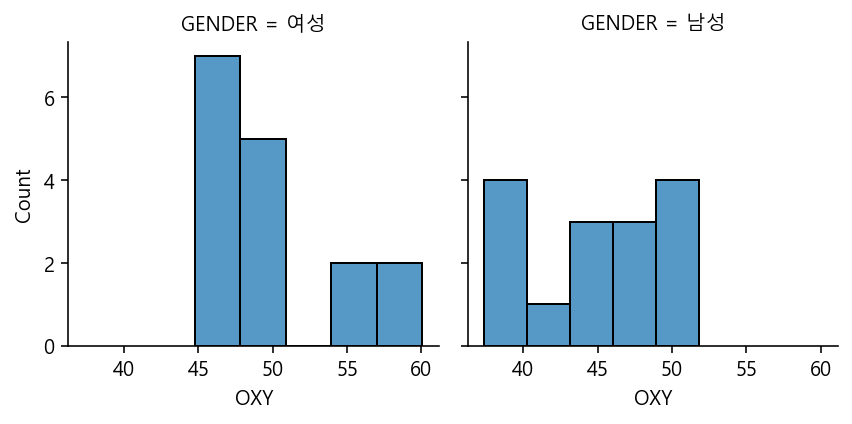

In [72]:
# seaborn 활용, 성별로 혈당 산소 요구량(OXY 히스토그램)
grid = sns.FacetGrid(df_fitness, col = 'GENDER')
grid.map(sns.histplot, 'OXY')

<AxesSubplot:xlabel='OXY', ylabel='Count'>

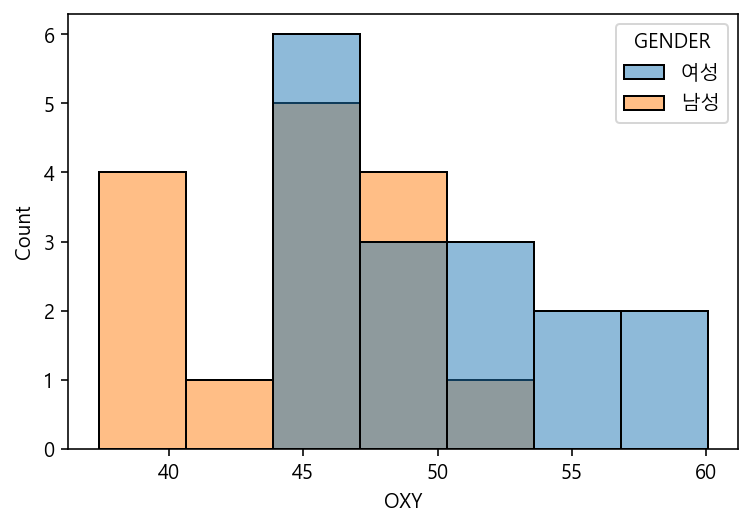

In [75]:
sns.histplot(data = df_fitness, x = 'OXY', hue = 'GENDER') # hue 기능,. 범주형 데이터여도 그리기 가능

# Box_Plot
- 상자 수염도표를 이용하여 데이터를 분포, 패턴 및 이상치 포함 등을 확인
- t검정, 분산분석에서 평균 차에 대한 유의차 검정에 사용됨

<AxesSubplot:title={'center':'OXY'}, xlabel='[GENDER, AGEGROUP]'>

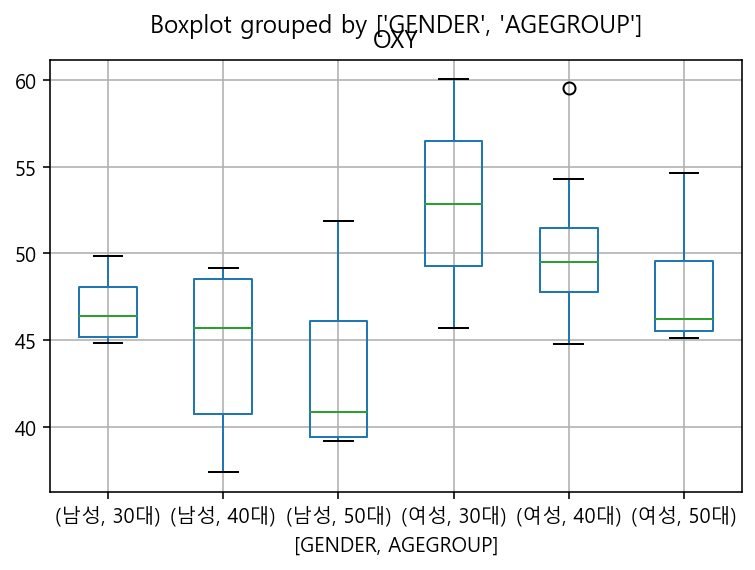

In [78]:
df_fitness.boxplot(column = 'OXY', by = ['GENDER', 'AGEGROUP'])

<AxesSubplot:xlabel='RUNTIME', ylabel='OXY'>

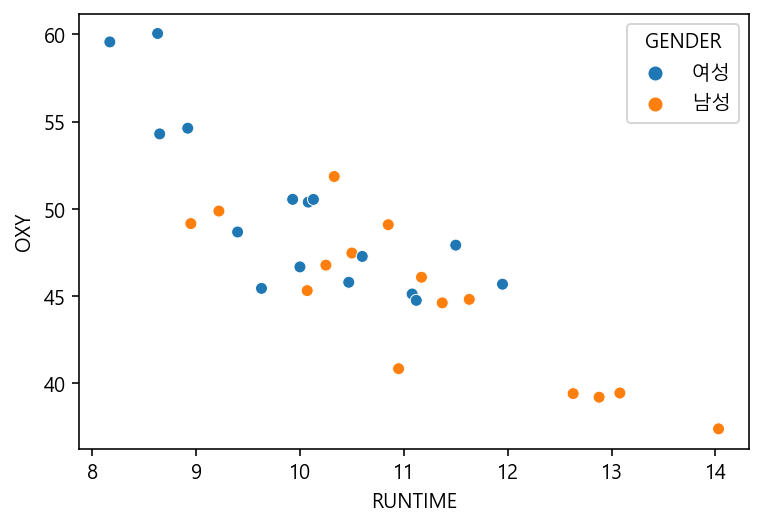

In [80]:
#seaborn 활용
sns.scatterplot(data = df_fitness, x = 'RUNTIME', y = 'OXY', hue = 'GENDER')

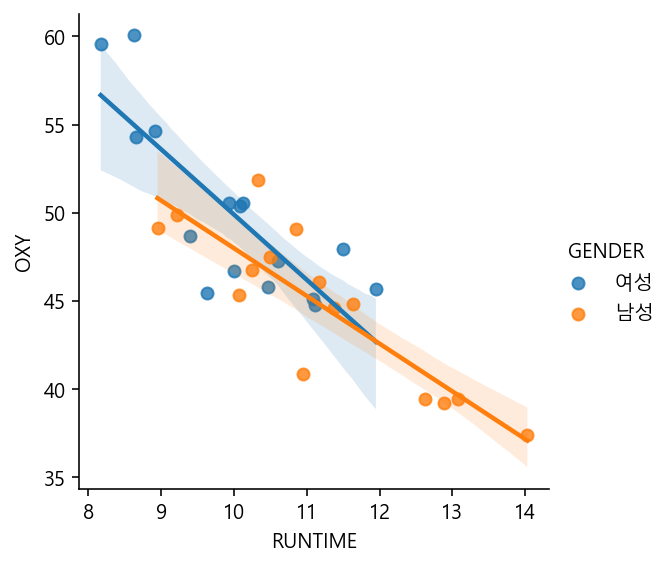

In [83]:
# 회귀분석에 사용 / 회귀선 포함하여 그릴 경우
sns.lmplot(data = df_fitness, x = 'RUNTIME', y = 'OXY', hue = 'GENDER', size = 4)

# scatter matrix (모든 변수에 대한 scatter)
: 다수의 연속형 변수간의 분포나 , 패턴, 관계 등을 동시에 표현하는 그래프


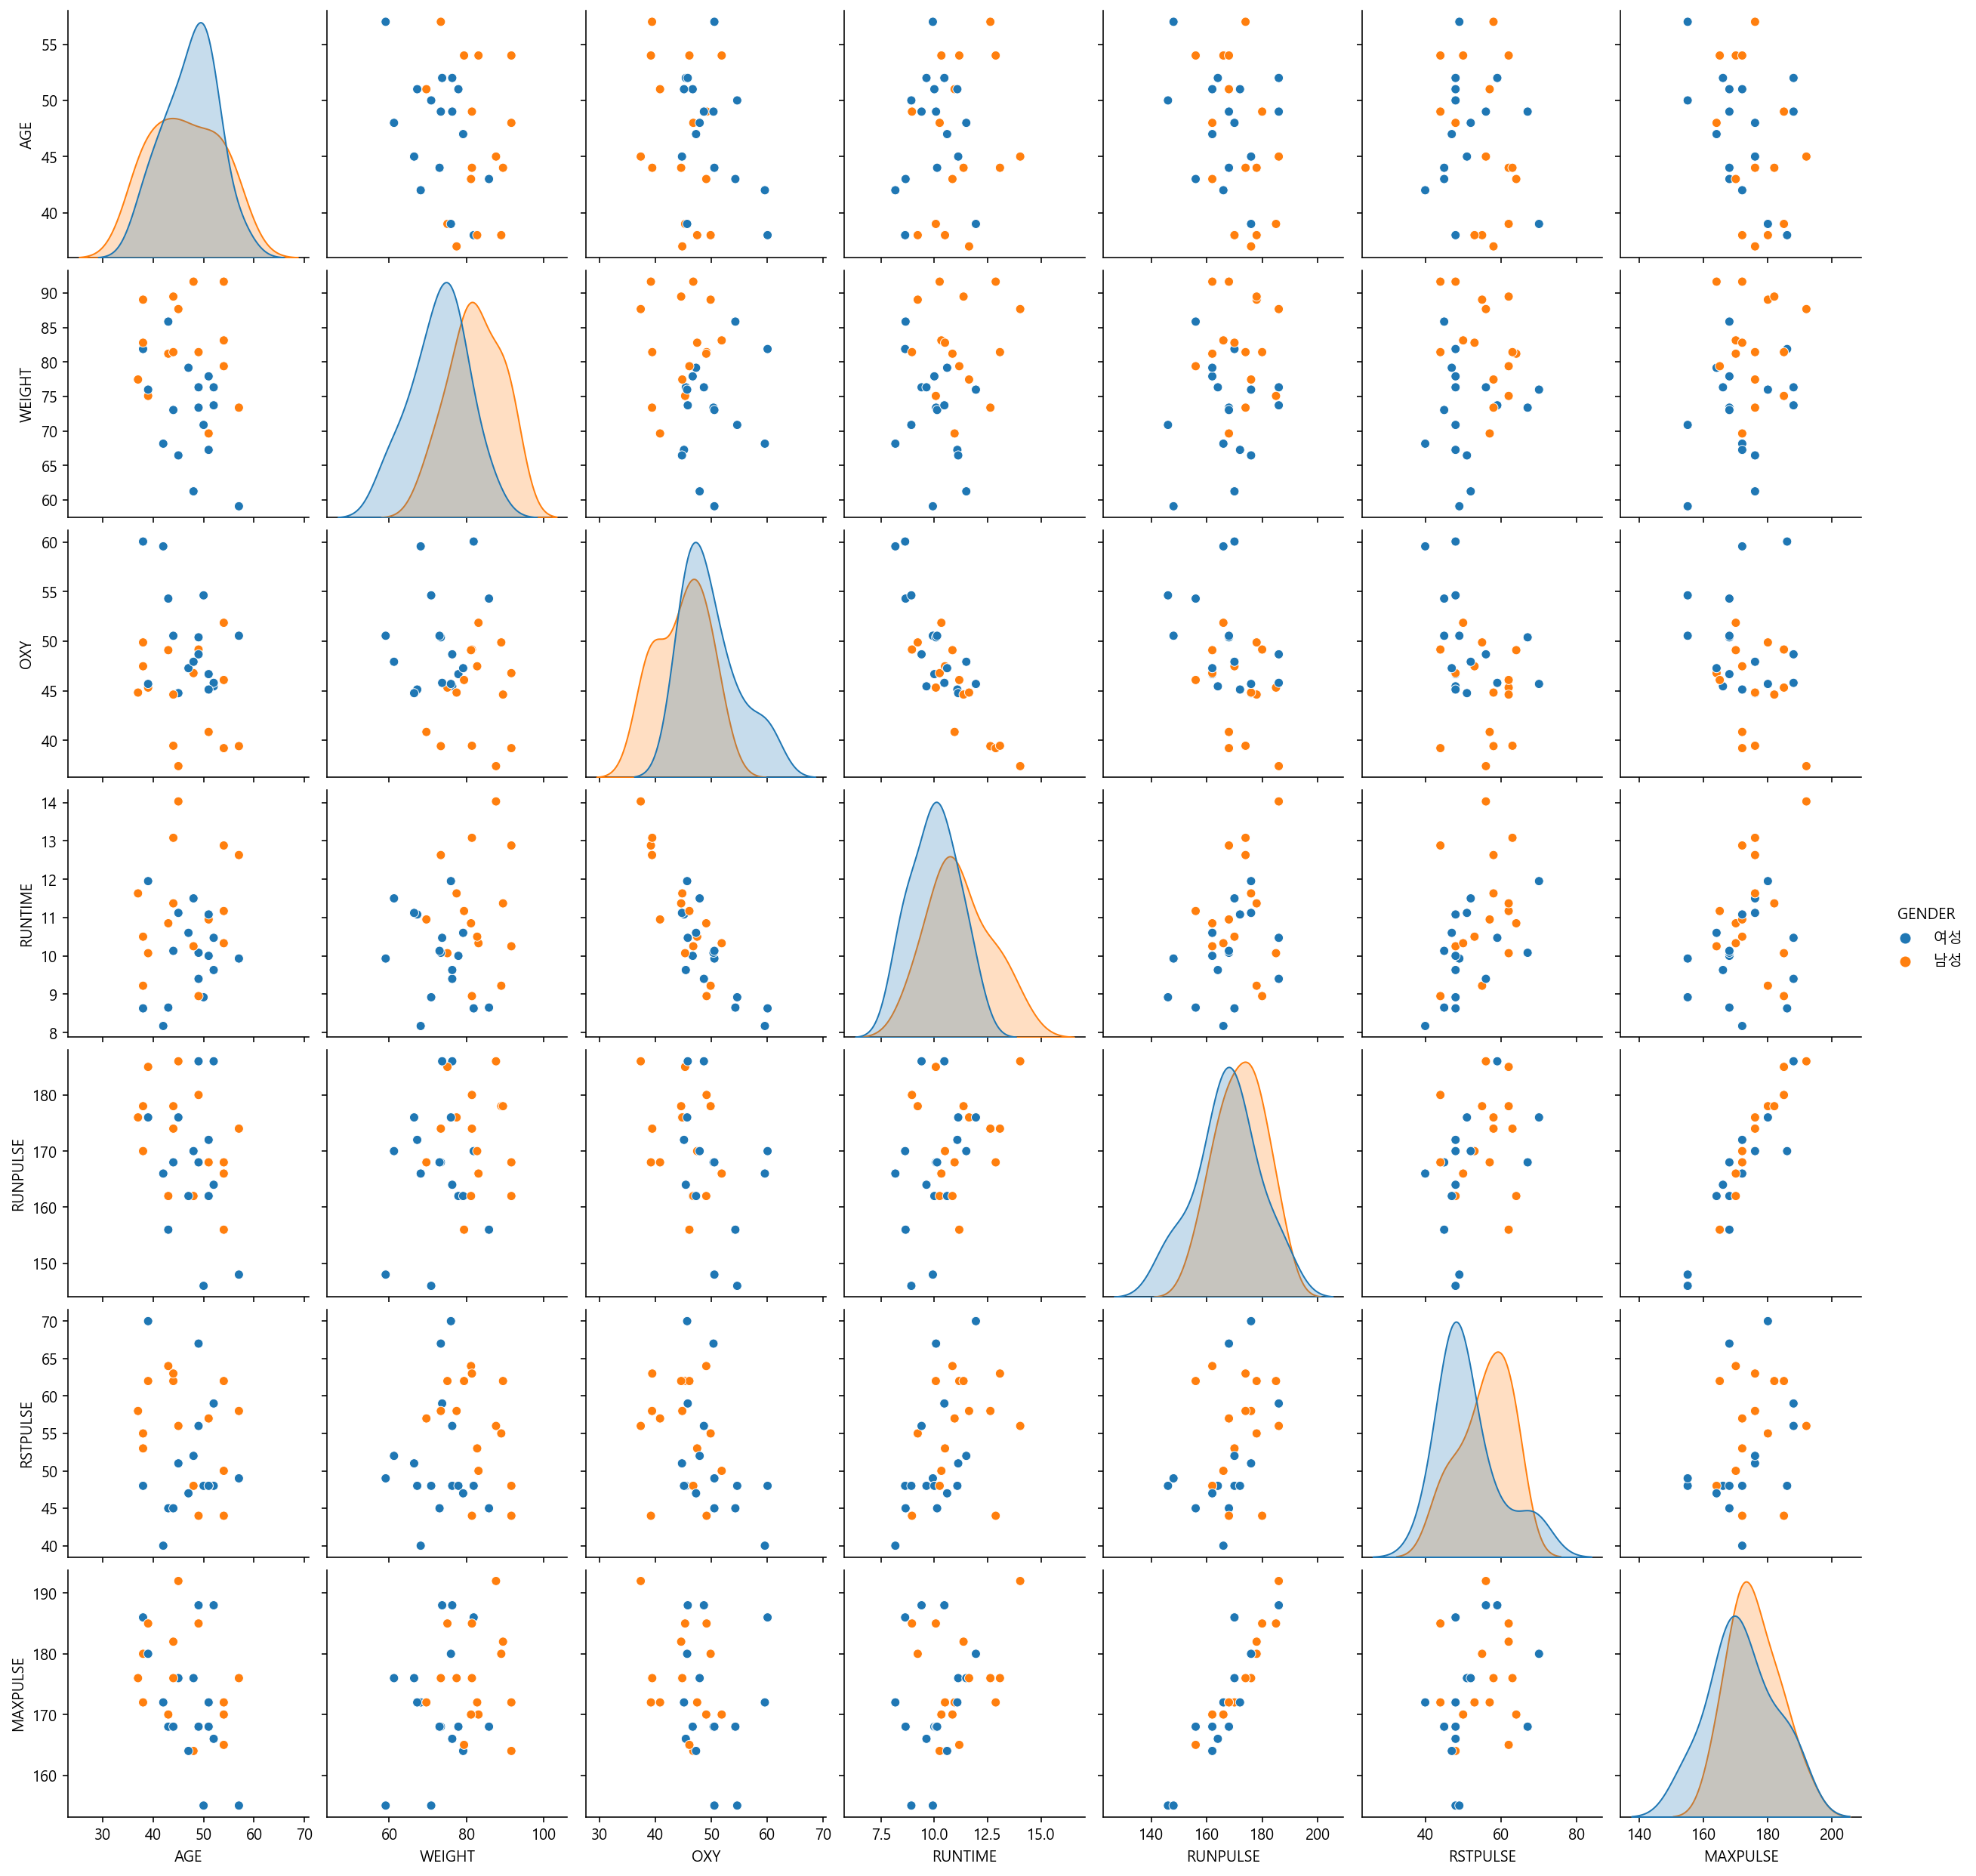

In [84]:
sns.pairplot(df_fitness, hue = 'GENDER')

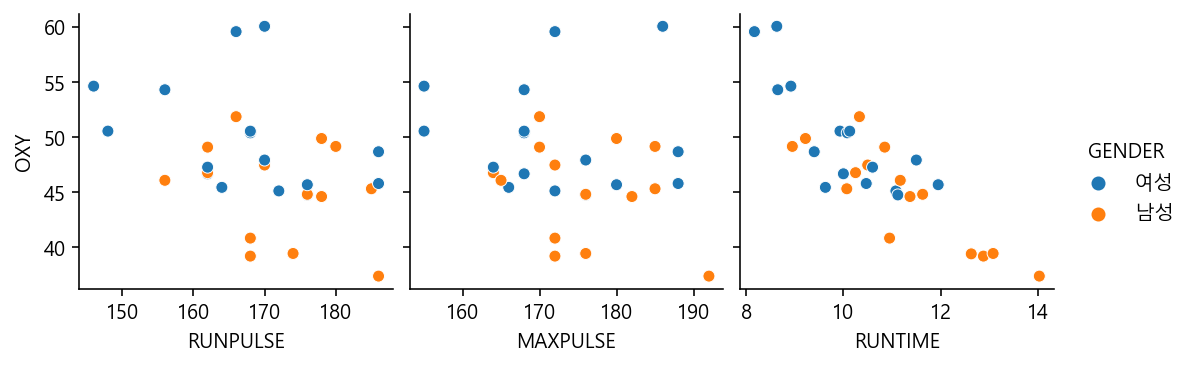

In [86]:
# Y 변수 : 혈당 산소 요구량 X 변수 : 운동(맥박), 최대, 운동시간 scatter matrix
sns.pairplot(data = df_fitness, y_vars='OXY', x_vars=['RUNPULSE', 'MAXPULSE', 'RUNTIME'], hue = 'GENDER')

In [87]:
df_fitness.corr() # 우상향하면.. 두변수간의 관계가 양의 상관관계를 갖고있다.
# if corr == 0, 연관관계가 없다

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
AGE,1.000000,-0.264408,-0.249929,0.133988,-0.333892,-0.183458,-0.381818
WEIGHT,-0.264408,1.000000,-0.162753,0.143508,0.181516,0.043974,0.249381
OXY,-0.249929,-0.162753,1.000000,-0.862195,-0.397974,-0.399356,-0.236740
RUNTIME,0.133988,0.143508,-0.862195,1.000000,0.313648,0.450383,0.226103
RUNPULSE,-0.333892,0.181516,-0.397974,0.313648,1.000000,0.352461,0.929754
RSTPULSE,-0.183458,0.043974,-0.399356,0.450383,0.352461,1.000000,0.305124
MAXPULSE,-0.381818,0.249381,-0.236740,0.226103,0.929754,0.305124,1.000000


# 시계열 데이터 분석(Trend Chart)
: x축(시간, 순서)의 변화에 따른 Y값의 변화, 추세 표현 그래프
- 주로 lineplot으로 확인

In [97]:
#통화별로 환율에 대한 시계열 그래프 그리기
new_df_currency = df_currency.pivot_table(index= "APPL_DATE", columns = "CURRENCY", values= "STD_RATE", aggfunc = 'mean')

new_df_currency

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
2016-01-01,181.48,976.99,1178.0
2016-01-02,181.48,976.99,1178.0
2016-01-03,181.48,976.99,1178.0
2016-01-04,181.10,992.62,1184.0
2016-01-05,181.94,993.00,1185.0
...,...,...,...
2016-03-27,179.45,1032.23,1169.0
2016-03-28,179.41,1031.46,1169.0
2016-03-29,179.18,1024.65,1162.0


<AxesSubplot:xlabel='APPL_DATE'>

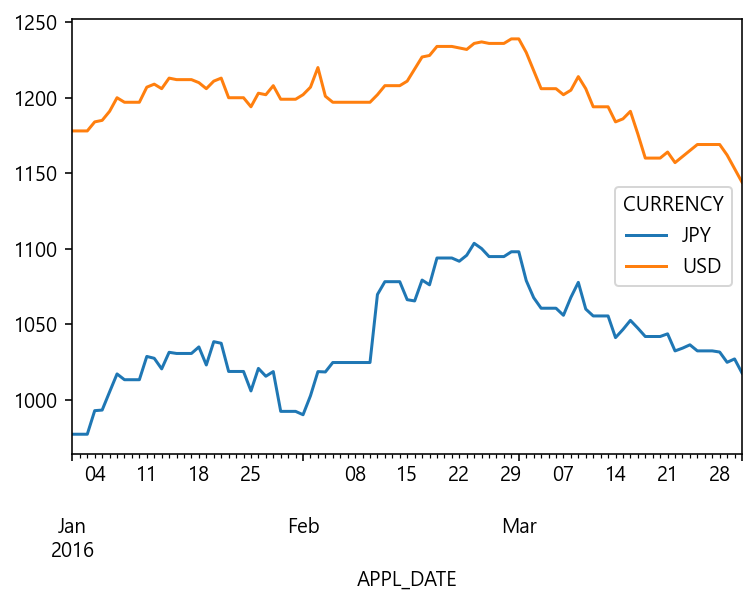

In [103]:
new_df_currency[['JPY', 'USD']].plot()

<AxesSubplot:xlabel='APPL_DATE', ylabel='STD_RATE'>

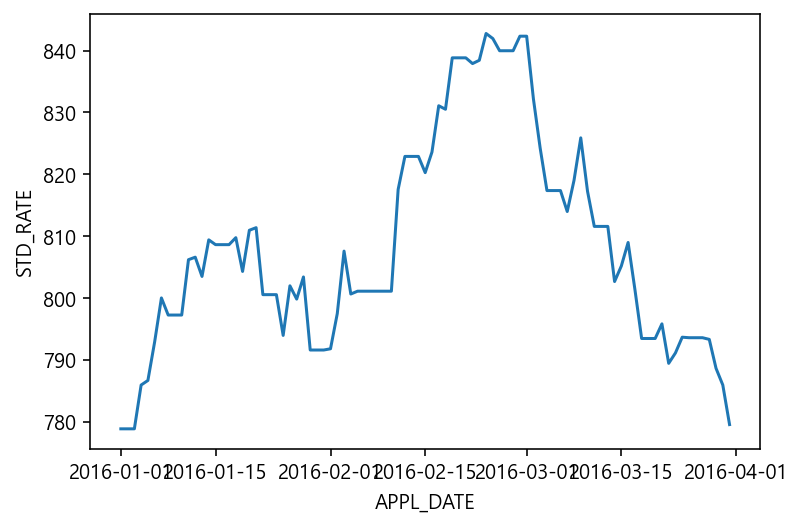

In [125]:
#SEABORN 라이브러리 lineplot
sns.lineplot(data = df_currency, x = 'APPL_DATE', y ='STD_RATE', ci = None)

<AxesSubplot:xlabel='APPL_DATE', ylabel='STD_RATE'>

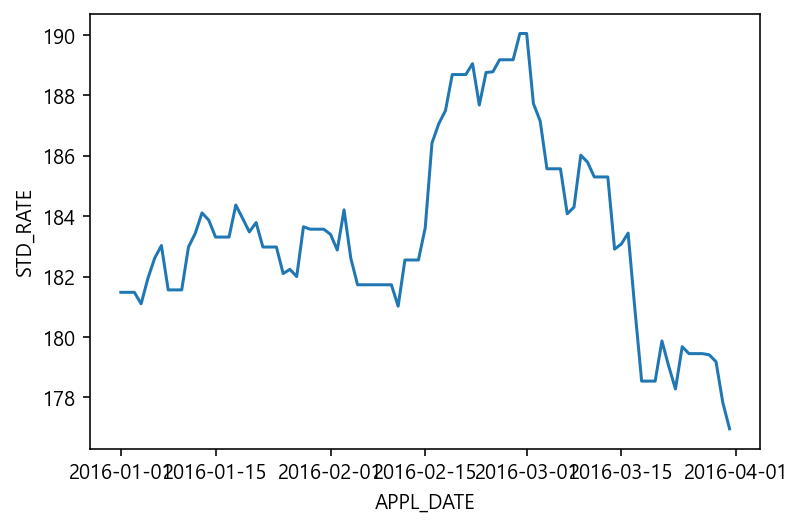

In [129]:
sns.lineplot(data = df_currency[df_currency['CURRENCY'] == 'CNY'], x = 'APPL_DATE', y = 'STD_RATE', ci = None)

<AxesSubplot:xlabel='APPL_DATE', ylabel='STD_RATE'>

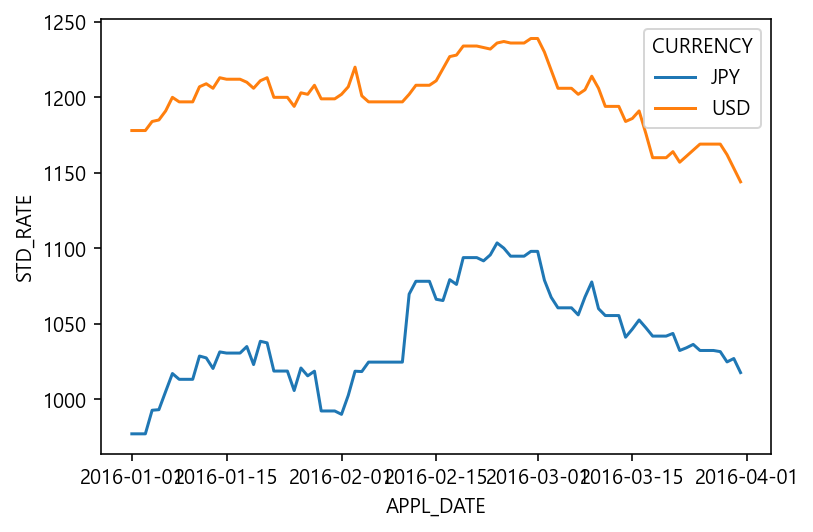

In [130]:
sns.lineplot(data = df_currency[df_currency['CURRENCY'] != 'CNY'], x = 'APPL_DATE', y = 'STD_RATE', hue = 'CURRENCY')

# Heat Map
- 연속형 변수 간의 상관계수 산출하여, 그래프를 통해 확인
- 항목별, 조합별 분포나 변화 트렌드를 확인 가능

In [135]:
#Heatmap

df_corr = df_fitness.corr()
df_corr

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
AGE,1.000000,-0.264408,-0.249929,0.133988,-0.333892,-0.183458,-0.381818
WEIGHT,-0.264408,1.000000,-0.162753,0.143508,0.181516,0.043974,0.249381
OXY,-0.249929,-0.162753,1.000000,-0.862195,-0.397974,-0.399356,-0.236740
RUNTIME,0.133988,0.143508,-0.862195,1.000000,0.313648,0.450383,0.226103
RUNPULSE,-0.333892,0.181516,-0.397974,0.313648,1.000000,0.352461,0.929754
RSTPULSE,-0.183458,0.043974,-0.399356,0.450383,0.352461,1.000000,0.305124
MAXPULSE,-0.381818,0.249381,-0.236740,0.226103,0.929754,0.305124,1.000000


<AxesSubplot:>

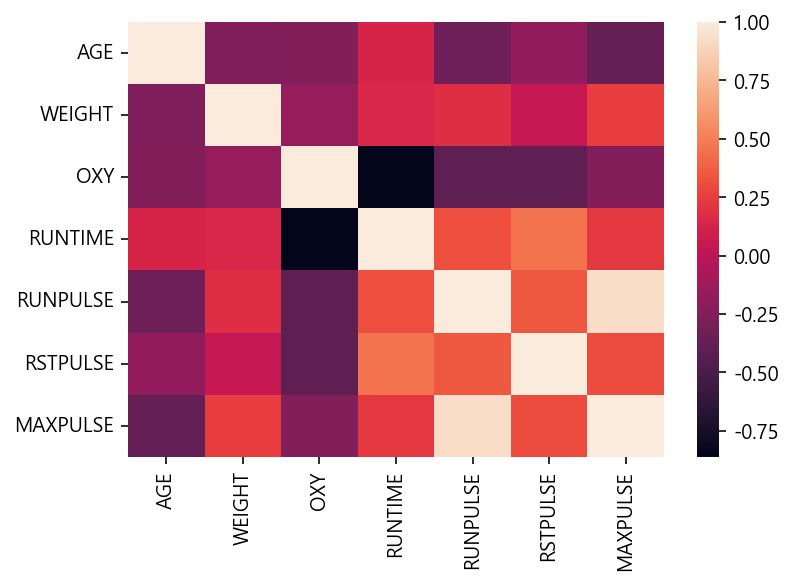

In [133]:
sns.heatmap(data=df_corr)

In [143]:
df = df_fitness.pivot_table(index = 'GENDER', columns = 'AGEGROUP', values = 'OXY')
df

AGEGROUP,30대,40대,50대
GENDER,,,
남성,46.86625,44.410000,43.476200
여성,52.86800,50.427125,48.031833


<AxesSubplot:xlabel='AGEGROUP', ylabel='GENDER'>

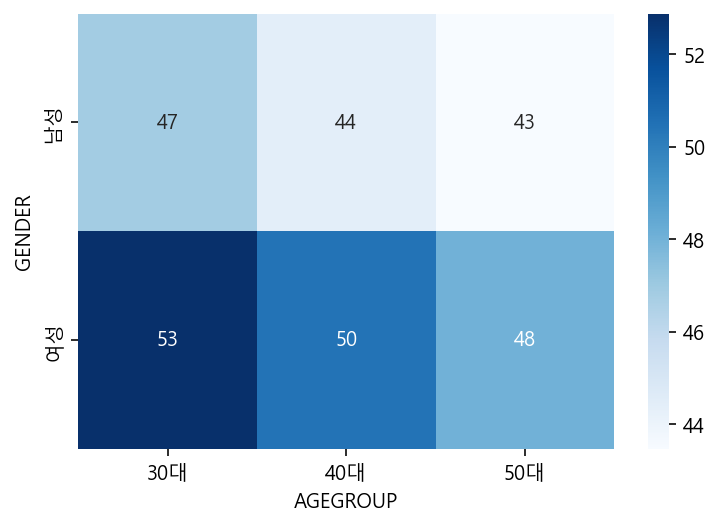

In [147]:
sns.heatmap(data = df, cmap = 'Blues', annot = True)

<AxesSubplot:>

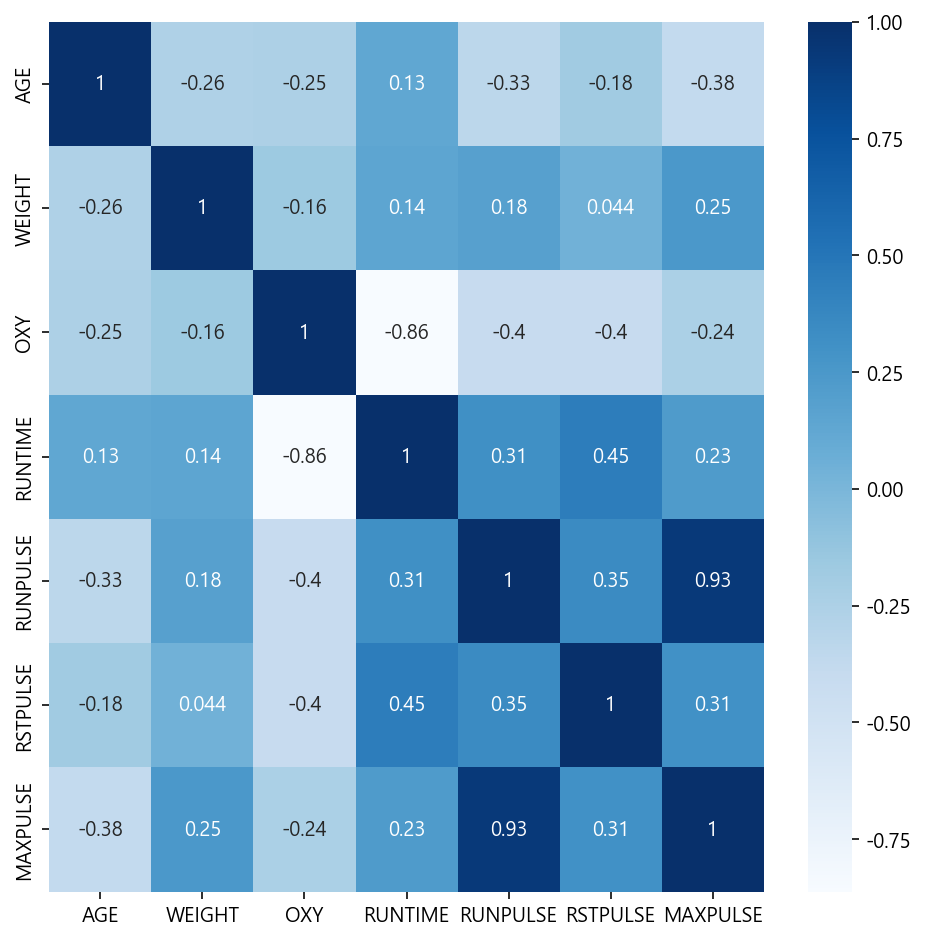

In [151]:
plt.figure(figsize = (8,8))
sns.heatmap(df_fitness.corr(method = 'pearson'), cmap = 'Blues', annot = True)